In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
covid_flu = pd.read_csv('../data/covid_flu.csv')
covid_flu.head()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Kiểm tra các cột có bao nhiêu phần tử Null

In [3]:
covid_flu.isnull().mean().sort_values()

Diagnosis                      0.000000
Age                            0.018893
Sex                            0.051282
Fever                          0.377193
Coughing                       0.420378
SoreThroat                     0.547908
Temperature                    0.576248
Fatigue                        0.641700
Diarrhea                       0.696356
NauseaVomitting                0.715924
RiskFactors                    0.858974
CTscanResults                  0.892713
lymphocytes                    0.894737
serumLevelsOfWhiteBloodCell    0.898111
CReactiveProteinLevels         0.907557
InitialPCRDiagnosis            0.929825
neutrophil                     0.930499
GroundGlassOpacity             0.937247
DurationOfIllness              0.941296
ShortnessOfBreath              0.949393
dtype: float64

Kiểm tra datatypes

In [4]:
covid_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

### Feature Improvement

#### Xử lý dữ liệu định lượng

Những cột dữ liệu định lượng có kiểu dữ liệu `float` hoặc `int`

In [5]:
numeric_type = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']
# numerical_columns = covid_flu.select_dtypes(numeric_type).columns.tolist()
numerical_columns = [col for col in covid_flu.columns if covid_flu[col].dtypes in numeric_type]
print(covid_flu[numerical_columns].isnull().mean().sort_values())

Age                            0.018893
Temperature                    0.576248
lymphocytes                    0.894737
serumLevelsOfWhiteBloodCell    0.898111
neutrophil                     0.930499
DurationOfIllness              0.941296
dtype: float64


**Xử lý missing value bằng mean/median**

Chúng ta có thể dùng thư viện SimpleImputer của Scikit learn

In [6]:
from sklearn.impute import SimpleImputer
num_impute = SimpleImputer(strategy='mean')
print(covid_flu['lymphocytes'].mean())
print(num_impute.fit_transform(covid_flu[['lymphocytes']]))

1.8501538461538463
[[1.85015385]
 [1.85015385]
 [1.85015385]
 ...
 [1.85015385]
 [1.85015385]
 [1.85015385]]


**Xử lý missing value bằng giá trị cụ thể**

Chúng ta có thể thay thế các giá trị bị khuyết thiếu bằng các giá trị cụ thể như -1, 0, 99, 999 cho biết rằng giá trị này không bị thiếu một cách ngẫu nhiên. Các giá trị này phải nằm ngoài khoảng giá trị của dữ liệu, ví dụ với nhiệt độ sẽ nằm trong khoảng 0-100 thì việc thay thế bằng 99 sẽ không hợp lý, do đó chúng ta chọn thay thế bằng số 999

In [7]:
arbitrary_imputer = SimpleImputer(strategy='constant', fill_value=999)
arbitrary_imputer.fit_transform(covid_flu[numerical_columns])

array([[ 67.        , 999.        , 999.        , 999.        ,
        999.        ,  38.11111111],
       [ 29.        , 999.        , 999.        , 999.        ,
        999.        , 999.        ],
       [ 22.        , 999.        , 999.        , 999.        ,
        999.        , 999.        ],
       ...,
       [  3.        , 999.        ,  15.        , 999.        ,
        999.        , 999.        ],
       [  4.        , 999.        ,   6.6       , 999.        ,
        999.        , 999.        ],
       [  6.        , 999.        ,   5.3       , 999.        ,
        999.        , 999.        ]])

**Xử lý missing value bằng IQR**

- Nếu biến là phân phối chuẩn, giá trị điền vào nên là mean + 3 * std
- Nếu biến có phân phối bị skewed, chúng ta sử dụng IQR để thêm giá trị cố định bằng cách dùng IQR * 1.5

![img](../images/missing_value_iqr.png)

Để áp dụng phương pháp này, ta dùng `EndTailImputer`  của thư viện feature-engine

Text(0.5, 1.0, 'lymphocytes')

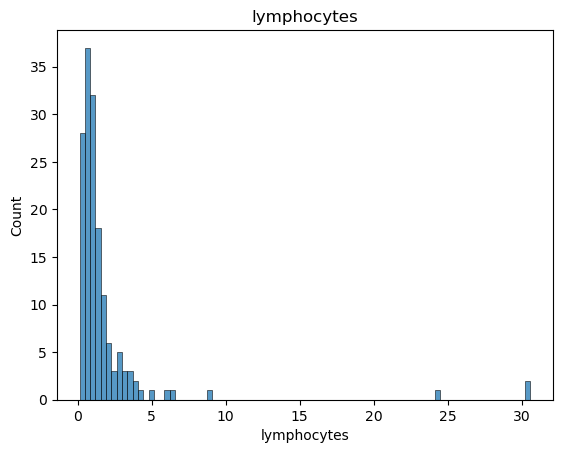

In [8]:
sns.histplot(covid_flu['lymphocytes'])
plt.title("lymphocytes")

In [9]:
from feature_engine.imputation import EndTailImputer

In [10]:
eti = EndTailImputer(imputation_method='gaussian', tail='right', fold=3)
print(covid_flu['lymphocytes'].mean() + 3 * covid_flu['lymphocytes'].std())
eti.fit_transform(covid_flu[['lymphocytes']]).max()

13.72015880654883


lymphocytes    30.6
dtype: float64

<Axes: ylabel='Count'>

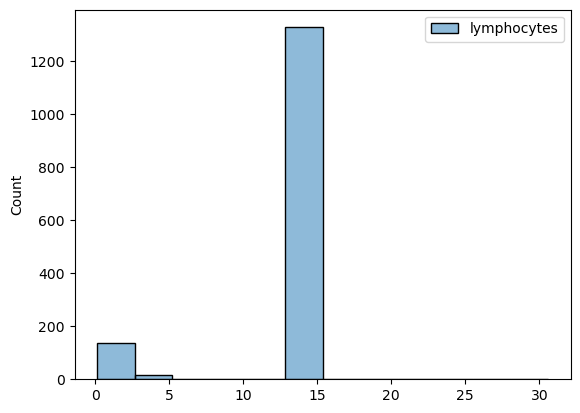

In [11]:
sns.histplot(eti.fit_transform(covid_flu[['lymphocytes']]))

#### Xử lý dữ liệu định tính

In [12]:
categorical_columns = [col for col in covid_flu.columns if covid_flu[col].dtypes=='object']
categorical_columns.remove('Diagnosis')
for categorical_column in categorical_columns:
    print('=======')
    print(categorical_column)
    print('=======')
    print(covid_flu[categorical_column].value_counts(dropna=False))

InitialPCRDiagnosis
InitialPCRDiagnosis
NaN    1378
Yes     100
No        4
Name: count, dtype: int64
Sex
Sex
M      748
F      658
NaN     76
Name: count, dtype: int64
CReactiveProteinLevels
CReactiveProteinLevels
NaN           1345
8                3
0.5              3
15               3
111              2
              ... 
5.78             1
67.62            1
13.2 mg/dL       1
21.27            1
0.6              1
Name: count, Length: 121, dtype: int64
CTscanResults
CTscanResults
NaN    1323
Yes     144
No       15
Name: count, dtype: int64
RiskFactors
RiskFactors
NaN                                                                   1273
asthma                                                                  36
pneumonia                                                               21
immuno                                                                  21
diabetes                                                                16
                                                

Trong các biến categorical, có hai biến `CReactiveProteinLevels` và `RiskFactors` biến có nhiều giá trị khác nhau, còn lại là các biến nhị phân. 

Ta tập trung phân tích biến nhị phân trước, cột `Sex` có giá trị là `M` và `F` trong khi các cột khác có giá trị `Yes`, `No`, do đó ta cũng biến đổi cột Sex sang giá trị này

In [13]:
covid_flu['isFemale'] = covid_flu['Sex'] == 'F'

In [14]:
covid_flu.replace({'Yes': True, 'No': False},inplace=True) 

**Xử lý liệu missing bằng phần tử xuất hiện nhiều nhất**

In [15]:
cat_impute = SimpleImputer(strategy='most_frequent')
print(covid_flu['Coughing'].value_counts(dropna=True, normalize=True))
print(covid_flu['Coughing'].head())
print(cat_impute.fit_transform(covid_flu[['Coughing']]))

Coughing
True     0.867288
False    0.132712
Name: proportion, dtype: float64
0    True
1     NaN
2     NaN
3    True
4     NaN
Name: Coughing, dtype: object
[[True]
 [True]
 [True]
 ...
 [True]
 [True]
 [True]]


**Xử lý dữ liệu missing bằng phần tử cố định**

Chúng ta có thể xem missing value như một nhãn mới và đặt nó là `UNKNOW`

In [16]:
fill_with_unk = SimpleImputer(strategy='constant', fill_value="UNK")
fill_with_unk.fit_transform(covid_flu[['RiskFactors']])

array([['UNK'],
       ['UNK'],
       ['UNK'],
       ...,
       ['UNK'],
       ['UNK'],
       ['UNK']], dtype=object)

### Feature Construction

#### Numerical feature transformattion

**Log transformation**

Chúng ta sử dụng log transformation khi phân phối dữ liệu quá lệch về bên trái, ví dụ như biến `lymphocytes` hầu hết các giá trị đều tập trung về giá trị 0. Vì hàm log không xác định khi giá trị bằng 0, do đó ta sử dụng log(1+x). Lưu ý biến đổi log chỉ áp dụng với dữ liệu mang giá trị dương

Text(0.5, 1.0, 'lymphocytes')

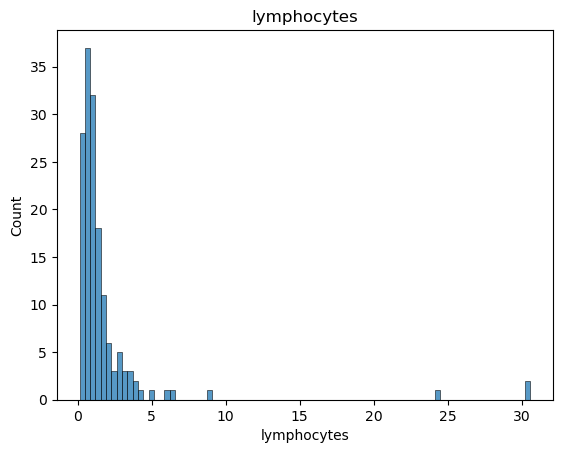

In [17]:
sns.histplot(covid_flu['lymphocytes'])
plt.title("lymphocytes")

Text(0.5, 1.0, 'lymphocytes')

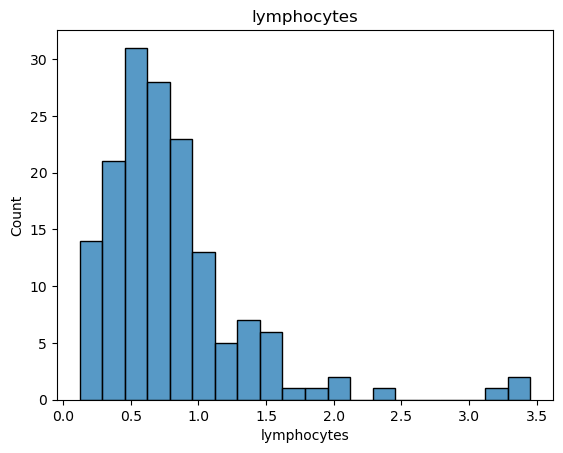

In [18]:
sns.histplot(covid_flu['lymphocytes'].map(np.log1p))
plt.title("lymphocytes")

**Box-cox**

Box-cox là phương pháp biến đổi không được phổ biến nhưng khá là hữu ích, Box-cox giúp chuyển dữ liệu về phân phối chuẩn. Trong thư viện scikit-learn ta sử dụng `PowerTransformer` để áp dụng phương pháp này. Tương tự log, Box-cox cũng chỉ áp dụng cho các giá trị dương

In [19]:
from sklearn.preprocessing import PowerTransformer

In [20]:
power_trans = PowerTransformer(method='box-cox')

<Axes: ylabel='Count'>

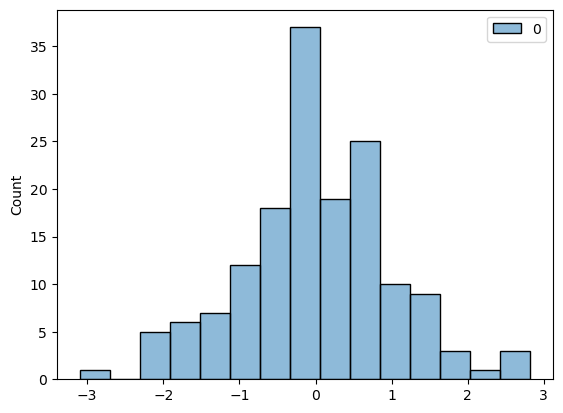

In [21]:
sns.histplot(power_trans.fit_transform(covid_flu[['lymphocytes']]))

Với biến `Age` có giá trị bằng 0, ta có thể cộng thêm 1 giá trị nhỏ để áp dụng box-cox

In [22]:
covid_flu[covid_flu['Age']==0].head()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,...,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,isFemale
726,H1N1,NaN,0.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,True,True,NaN,True,False,NaN,NaN,False
727,H1N1,NaN,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,False,True,NaN,False,False,NaN,NaN,True
728,H1N1,NaN,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,True,NaN,True,False,NaN,NaN,True
729,H1N1,NaN,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,True,NaN,False,False,NaN,NaN,True
730,H1N1,NaN,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,True,True,NaN,True,False,NaN,NaN,True


In [23]:
covid_flu['Age'] = covid_flu['Age'] + 0.01

<Axes: ylabel='Count'>

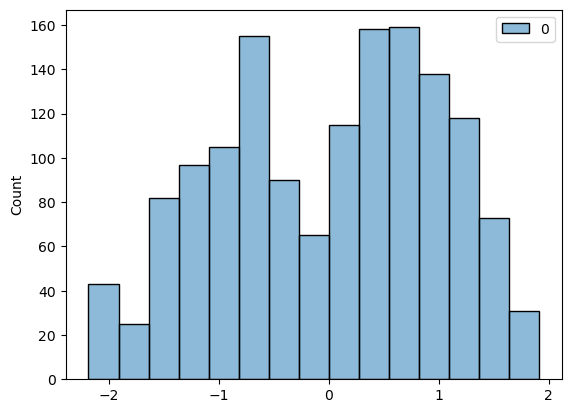

In [24]:
sns.histplot(power_trans.fit_transform(covid_flu[['Age']]))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'neutrophil'}>],
       [<Axes: title={'center': 'serumLevelsOfWhiteBloodCell'}>,
        <Axes: title={'center': 'lymphocytes'}>],
       [<Axes: title={'center': 'DurationOfIllness'}>,
        <Axes: title={'center': 'Temperature'}>]], dtype=object)

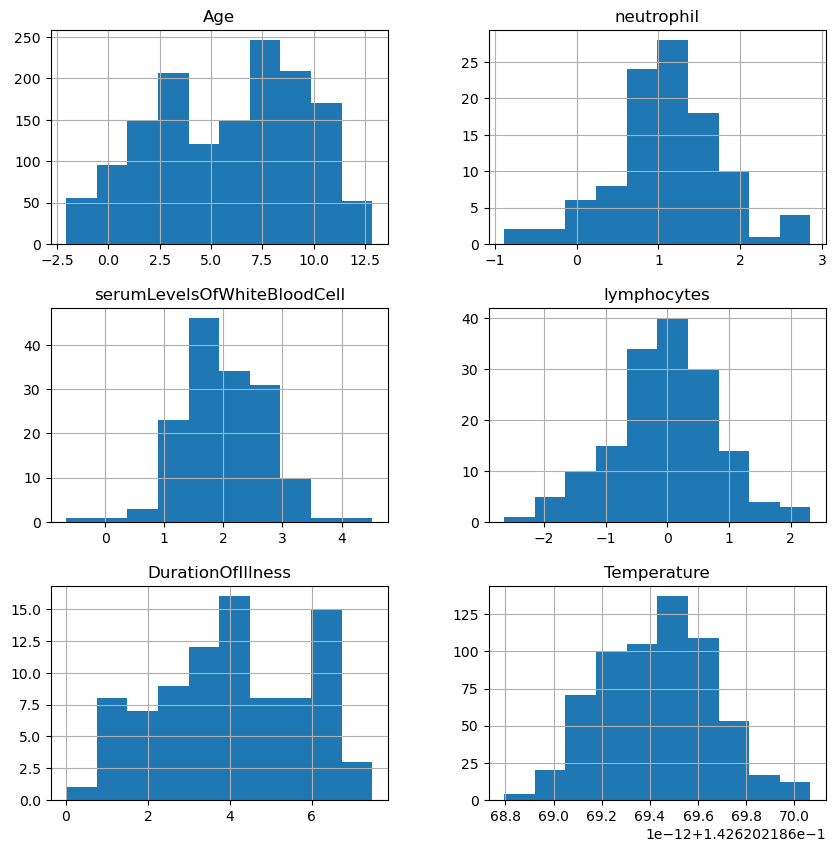

In [25]:
from sklearn.preprocessing import PowerTransformer
 
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
pd.DataFrame(
    boxcox_transformer.fit_transform(covid_flu[numerical_columns]), 
    columns=numerical_columns
).hist(figsize=(10, 10))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'neutrophil'}>],
       [<Axes: title={'center': 'serumLevelsOfWhiteBloodCell'}>,
        <Axes: title={'center': 'lymphocytes'}>],
       [<Axes: title={'center': 'DurationOfIllness'}>,
        <Axes: title={'center': 'Temperature'}>]], dtype=object)

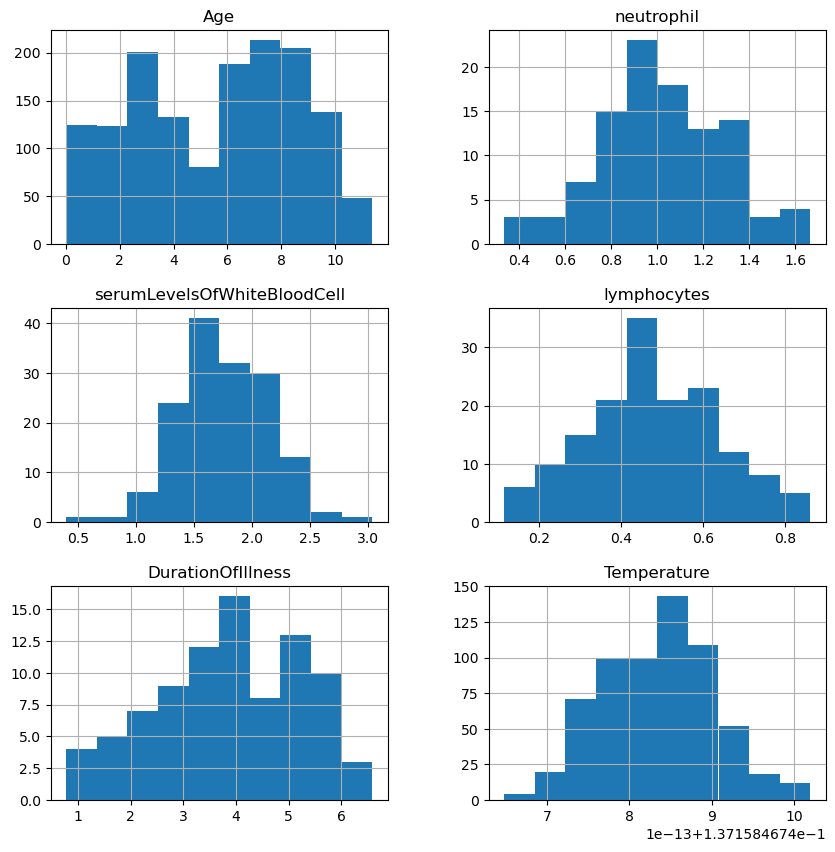

In [26]:
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
pd.DataFrame(
    yeo_johnson_transformer.fit_transform(covid_flu[numerical_columns]), 
    columns=numerical_columns
).hist(figsize=(10, 10))

#### Feature Scaling

In [27]:
covid_flu[numerical_columns].describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,26.481040,6.854078,6.885159,1.850154,13.988506,38.068312
std,21.487982,12.690131,4.346668,3.956668,9.043171,1.094468
min,0.010000,0.446000,0.500000,0.130000,1.000000,35.722222
25%,7.010000,2.160000,3.995000,0.637500,7.000000,37.222222
50%,24.010000,3.310000,5.690000,0.905500,12.000000,38.000000
75%,42.010000,6.645000,9.155000,1.605000,20.000000,38.722222
max,88.010000,93.000000,36.070000,30.600000,37.000000,42.222222


In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
pd.DataFrame(  # mean of 0 and std of 1 but ranges are different (see min and max)
    StandardScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1.454000e+03,103.000000,1.510000e+02,1.560000e+02,8.700000e+01,6.280000e+02
mean,1.368308e-16,0.000000,-1.411674e-16,-1.708035e-17,-5.614921e-17,1.708471e-15
std,1.000344e+00,1.004890,1.003328e+00,1.003221e+00,1.005797e+00,1.000797e+00
min,-1.232324e+00,-0.507435,-1.473866e+00,-4.361482e-01,-1.444604e+00,-2.145299e+00
25%,-9.064480e-01,-0.371709,-6.671264e-01,-3.074706e-01,-7.772737e-01,-7.736770e-01
50%,-1.150359e-01,-0.280644,-2.758748e-01,-2.395187e-01,-2.211651e-01,-6.246559e-02
75%,7.229298e-01,-0.016556,5.239403e-01,-6.215921e-02,6.686088e-01,5.979450e-01
max,2.864398e+00,6.821614,6.736646e+00,7.289577e+00,2.559378e+00,3.798396e+00


In [29]:
pd.DataFrame(  # mean and std are different but min and max are 0s and 1s
    MinMaxScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,0.300807,0.069236,0.179510,0.056454,0.360792,0.360937
std,0.244182,0.137111,0.122200,0.129855,0.251199,0.168380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.079545,0.018519,0.098257,0.016656,0.166667,0.230769
50%,0.272727,0.030944,0.145909,0.025451,0.305556,0.350427
75%,0.477273,0.066977,0.243323,0.048408,0.527778,0.461538
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Construction categorical data

#### Binning

Binning là phương pháp biến đổi dữ liệu dạng số (numerical sang dữ liệu dạng categorical), những giá trị nằm trong một khoảng định trước sẽ được biến đổi thành nhóm đại diện cho khoảng đó

**Uniform**

<Axes: title={'center': 'Age (Uniform Binning)'}, xlabel='Age', ylabel='Frequency'>

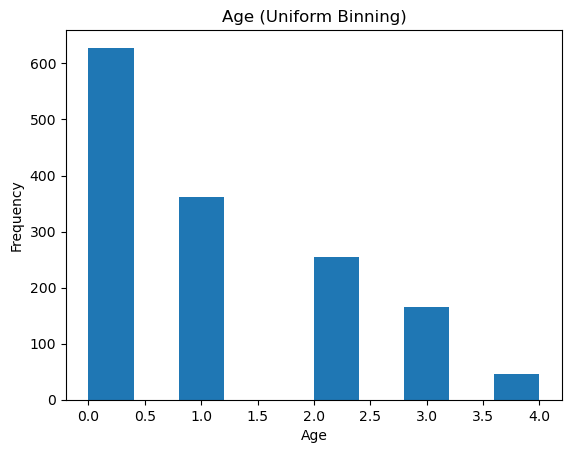

In [30]:
from sklearn.preprocessing import KBinsDiscretizer
 
binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())
pd.Series(binned_data.reshape(-1,)).plot(
    title='Age (Uniform Binning)', kind='hist', xlabel='Age')

**Quantiles**

<Axes: title={'center': 'Age (Uniform Binning)'}, xlabel='Age', ylabel='Frequency'>

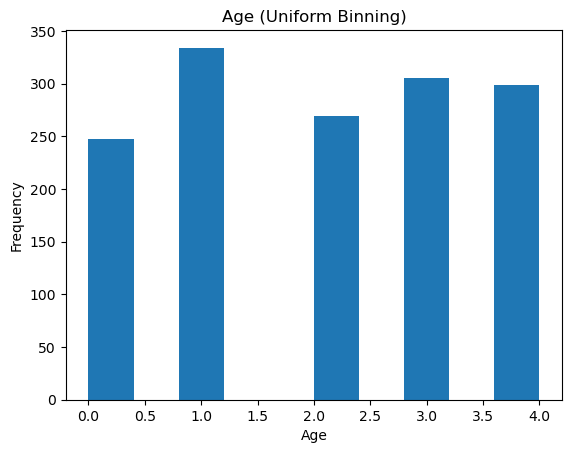

In [31]:
binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())
pd.Series(binned_data.reshape(-1,)).plot(
    title='Age (Uniform Binning)', kind='hist', xlabel='Age')

**Kmeans**

f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


<Axes: title={'center': 'Age (Uniform Binning)'}, xlabel='Age', ylabel='Frequency'>

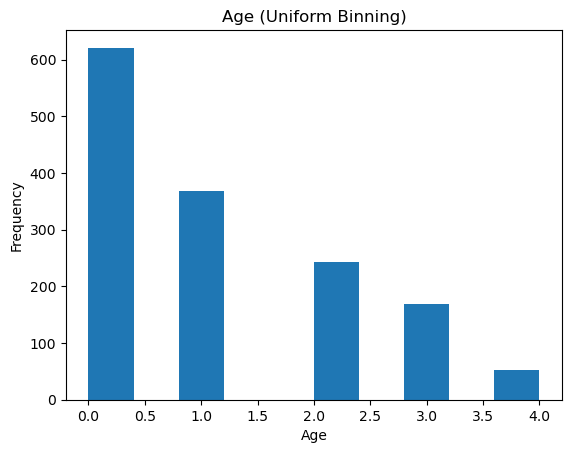

In [32]:
binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())
pd.Series(binned_data.reshape(-1,)).plot(
    title='Age (Uniform Binning)', kind='hist', xlabel='Age')

#### One-hot Encoding

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import MultiLabelBinarizer
 
class DummifyRiskFactor(BaseEstimator,TransformerMixin):          
    def __init__(self):
        self.label_binarizer = None
        
    def parse_risk_factors(self, comma_sep_factors):
        ''' asthma,heart disease -> ['asthma', 'heart disease'] '''
        try:
            return [s.strip().lower() for s in comma_sep_factors.split(',')]
        except:
            return []
    
    def fit(self, X, y=None):
        self.label_binarizer = MultiLabelBinarizer()                  
        self.label_binarizer.fit(X.apply(self.parse_risk_factors))    
        return self
    def transform(self, X, y=None):
        return self.label_binarizer.transform(X.apply(self.parse_risk_factors))

In [34]:
drf = DummifyRiskFactor()
risks = drf.fit_transform(covid_flu['RiskFactors'])
print(risks.shape)
pd.DataFrame(risks, columns=drf.label_binarizer.classes_).columns

(1482, 41)


Index(['asthma', 'athero',
       'atopic dermatitis and repetitive respiratory infections',
       'begin tumor (removed)', 'chronic', 'chronic endrocrine disorder',
       'chronic liver dieseas', 'chronic liver disorder',
       'chronic neurological disorders',
       'chronic obstructive pulmonary disease', 'chronic sinusitis',
       'chronic spontaneous urticaria', 'congestive',
       'coronary artery disease', 'coronary eart disease', 'diabetes',
       'fatty liver', 'fetal distress', 'gastrectomy', 'heart disease',
       'hematological disease', 'hepb', 'hypertension',
       'hypertension and copd', 'hypertention', 'hyperthyroidism',
       'hypothyroidism', 'immuno', 'influenza', 'kidney transplant recipient',
       'lung cancer', 'lung disease', 'myxoma of abdominal cavity', 'obesity',
       'pneumomediastinum and subcutaneous emphysema', 'pneumonia',
       'pre-eclampsia', 'prom', 'renal disease', 'respiratory disease',
       'rheumatoid arthritis'],
      dtype='ob

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
ct = CountVectorizer(tokenizer=lambda x: [i.strip().lower() for i in x.split(',')])
risks = ct.fit_transform(covid_flu['RiskFactors'].fillna('unk')).toarray()
pd.DataFrame(risks, columns=ct.get_feature_names_out())

f:\Vendors\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,asthma,athero,atopic dermatitis and repetitive respiratory infections,begin tumor (removed),chronic,chronic endrocrine disorder,chronic liver dieseas,chronic liver disorder,chronic neurological disorders,chronic obstructive pulmonary disease,...,myxoma of abdominal cavity,obesity,pneumomediastinum and subcutaneous emphysema,pneumonia,pre-eclampsia,prom,renal disease,respiratory disease,rheumatoid arthritis,unk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Domain-specific

In [36]:
covid_flu['FluSymptoms'] = covid_flu[
    ['Diarrhea', 'Fever', 'Coughing', 'SoreThroat', 
     'NauseaVomitting', 'Fatigue']].sum(axis=1)>=2

In [37]:
binary_features = [                                    
    'isFemale', 'GroundGlassOpacity', 'CTscanResults', 
    'Diarrhea', 'Fever', 'FluSymptoms',
    'Coughing', 'SoreThroat', 'NauseaVomitting', 
    'Fatigue', 'InitialPCRDiagnosis'
]

### Create FE Pipeline

In [38]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion 

In [39]:
risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('vectorizer',DummifyRiskFactor())
    ]
)
binary_pipeline = Pipeline(
    [
        ('select_categorical_feature', FunctionTransformer(lambda df: df[binary_features])),
         ('fillna', SimpleImputer(strategy='constant', fill_value=False))
    ]
)
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='median')),
    ]
)

In [40]:
from sklearn.model_selection import train_test_split
X, y = covid_flu.drop(['Diagnosis'], axis=1), covid_flu['Diagnosis']
x_train, x_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, test_size=.2
)

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [42]:
def simple_grid_search(
    x_train, y_train, x_test, y_test, feature_engineering_pipeline):
    ''' 
    simple helper function to grid search an 
    ExtraTreesClassifier model and print out a classification report
    for the best model where best here is defined as having 
    the best cross-validated accuracy on the training set
    '''
    
    params = {  # some simple parameters to grid search
        'max_depth': [10, None],
        'n_estimators': [10, 50, 100, 500],
        'criterion': ['gini', 'entropy']
    }
 
    base_model = ExtraTreesClassifier()
 
    model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
    start_time = time.time()  # capture the start time
    # fit FE pipeline to training data and use it to transform test data
    if feature_engineering_pipeline:
        parsed_x_train = feature_engineering_pipeline.fit_transform(
            x_train, y_train)
        parsed_x_test = feature_engineering_pipeline.transform(x_test)
    else:
        parsed_x_train = x_train
        parsed_x_test = x_test
 
    parse_time = time.time()
    print(f"Parsing took {(parse_time - start_time):.2f} seconds")
 
    model_grid_search.fit(parsed_x_train, y_train)
    fit_time = time.time()
    print(f"Training took {(fit_time - start_time):.2f} seconds")
     
    best_model = model_grid_search.best_estimator_
 
    print(classification_report(
        y_true=y_test, y_pred=best_model.predict(parsed_x_test)))
    end_time = time.time()
    print(f"Overall took {(end_time - start_time):.2f} seconds")    
 
    return best_model

In [43]:
simple_grid_search(x_train, y_train, x_test, y_test, 
risk_factor_pipeline) 

Parsing took 0.01 seconds


f:\Vendors\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:895: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 6.12 seconds
              precision    recall  f1-score   support

     COVID19       0.80      0.10      0.17        82
        H1N1       0.74      0.99      0.85       215

    accuracy                           0.74       297
   macro avg       0.77      0.54      0.51       297
weighted avg       0.76      0.74      0.66       297

Overall took 6.13 seconds


ExtraTreesClassifier(n_estimators=10)

In [44]:
simple_fe = FeatureUnion([                       
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])
 
# simple_fe.fit_transform(x_train, y_train).shape
simple_grid_search(x_train, y_train, x_test, y_test, 
binary_pipeline) 

Parsing took 0.01 seconds
Training took 6.15 seconds
              precision    recall  f1-score   support

     COVID19       0.79      0.60      0.68        82
        H1N1       0.86      0.94      0.90       215

    accuracy                           0.85       297
   macro avg       0.82      0.77      0.79       297
weighted avg       0.84      0.85      0.84       297

Overall took 6.16 seconds


ExtraTreesClassifier(criterion='entropy', max_depth=10, n_estimators=50)

In [45]:
simple_grid_search(x_train, y_train, x_test, y_test, 
numerical_pipeline) 

Parsing took 0.01 seconds
Training took 6.68 seconds
              precision    recall  f1-score   support

     COVID19       0.77      0.70      0.73        82
        H1N1       0.89      0.92      0.90       215

    accuracy                           0.86       297
   macro avg       0.83      0.81      0.82       297
weighted avg       0.86      0.86      0.86       297

Overall took 6.69 seconds


ExtraTreesClassifier(n_estimators=50)

In [46]:
simple_grid_search(x_train, y_train, x_test, y_test, 
simple_fe) 

Parsing took 0.01 seconds


f:\Vendors\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:895: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 7.71 seconds
              precision    recall  f1-score   support

     COVID19       0.84      0.84      0.84        82
        H1N1       0.94      0.94      0.94       215

    accuracy                           0.91       297
   macro avg       0.89      0.89      0.89       297
weighted avg       0.91      0.91      0.91       297

Overall took 7.75 seconds


ExtraTreesClassifier(n_estimators=500)

Thay đổi impute numerical thành mean

In [47]:
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: 
df[numerical_columns])),
        ('impute', SimpleImputer(strategy='mean')),
        ('scale', StandardScaler())
    ]
)
 
simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])                                                                      
 
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.01 seconds


f:\Vendors\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:895: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 7.25 seconds
              precision    recall  f1-score   support

     COVID19       0.85      0.84      0.85        82
        H1N1       0.94      0.94      0.94       215

    accuracy                           0.92       297
   macro avg       0.90      0.89      0.89       297
weighted avg       0.92      0.92      0.92       297

Overall took 7.27 seconds


Đổi thành 999

In [48]:
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: 
df[numerical_columns])),
        ('impute', SimpleImputer(strategy='constant', fill_value=999)),
        ('scale', StandardScaler())
    ]
)
 
simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])                                                                      
 
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.01 seconds


f:\Vendors\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:895: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 6.89 seconds
              precision    recall  f1-score   support

     COVID19       0.89      0.87      0.88        82
        H1N1       0.95      0.96      0.95       215

    accuracy                           0.93       297
   macro avg       0.92      0.91      0.92       297
weighted avg       0.93      0.93      0.93       297

Overall took 6.90 seconds


Thêm box-cox numerical

In [49]:
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df:  df[numerical_columns])),
        ('turn_into_df', FunctionTransformer(lambda matrix:pd.DataFrame(matrix))),  # turn back into dataframe
        ('end_of_tail', EndTailImputer(imputation_method='gaussian',tail='right')),
        ('Box-Cox', PowerTransformer(method='box-cox', standardize=True))  

    ]
)
 
simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

In [50]:
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.02 seconds


f:\Vendors\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:895: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 7.45 seconds
              precision    recall  f1-score   support

     COVID19       0.87      0.87      0.87        82
        H1N1       0.95      0.95      0.95       215

    accuracy                           0.93       297
   macro avg       0.91      0.91      0.91       297
weighted avg       0.93      0.93      0.93       297

Overall took 7.49 seconds


Mặc dù nó thấp hơn, nhưng hãy thử thêm ordinal_bins

In [51]:
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df:  df[numerical_columns])),
        ('turn_into_df', FunctionTransformer(lambda matrix:pd.DataFrame(matrix))),  # turn back into dataframe
        ('end_of_tail', EndTailImputer(imputation_method='gaussian')),
        ('Box-Cox', PowerTransformer(method='box-cox', standardize=True)),           
        ('ordinal_bins', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans'))
 
    ]
)
 
simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

In [52]:
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

Parsing took 0.37 seconds
Training took 7.68 seconds
              precision    recall  f1-score   support

     COVID19       0.95      0.85      0.90        82
        H1N1       0.95      0.98      0.96       215

    accuracy                           0.95       297
   macro avg       0.95      0.92      0.93       297
weighted avg       0.95      0.95      0.95       297

Overall took 7.72 seconds


### Feature Selection

#### Mutual information

MI là một phương pháp để kiểm tra 

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2
risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(
                               lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor()),
        ('mutual_info', SelectKBest(mutual_info_classif, k=20))
    ]
)
 
 
simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])
 
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

Parsing took 0.48 seconds
Training took 7.30 seconds
              precision    recall  f1-score   support

     COVID19       0.95      0.85      0.90        82
        H1N1       0.95      0.98      0.96       215

    accuracy                           0.95       297
   macro avg       0.95      0.92      0.93       297
weighted avg       0.95      0.95      0.95       297

Overall took 7.32 seconds


In [54]:
risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(
                               lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor()),
        ('mutual_info', SelectKBest(chi2, k=20))
    ]
)
 
 
simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])
 
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

Parsing took 0.38 seconds
Training took 7.18 seconds
              precision    recall  f1-score   support

     COVID19       0.95      0.87      0.90        82
        H1N1       0.95      0.98      0.97       215

    accuracy                           0.95       297
   macro avg       0.95      0.92      0.94       297
weighted avg       0.95      0.95      0.95       297

Overall took 7.19 seconds


In [55]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
 
risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(
                               lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor()),
        ('tree_selector', SelectFromModel(
                 max_features=20, estimator=DecisionTreeClassifier()))      
    ]
)
simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])
 
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
f:\Vendors\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

Parsing took 0.37 seconds
Training took 7.11 seconds
              precision    recall  f1-score   support

     COVID19       0.93      0.85      0.89        82
        H1N1       0.95      0.98      0.96       215

    accuracy                           0.94       297
   macro avg       0.94      0.92      0.93       297
weighted avg       0.94      0.94      0.94       297

Overall took 7.12 seconds
